### Monte arlo on 2D Ising model phase transition

In [41]:
from numpy.typing import NDArray  # trying to be typesafe
import numpy as np  # needed all over the place
import scipy
from scipy.stats import skew
from IPython.display import HTML # in line animations

import os   # file and file path

from itertools import count
import pandas as pd
import matplotlib.pyplot as plt  # for plots

from matplotlib import colors  # not quite sure what fore
from matplotlib.ticker import PercentFormatter  # also not sure, maybe animation..?
from matplotlib.animation import FuncAnimation, FFMpegWriter  # for animations

from IPython.display import clear_output  # display data with print

In [ ]:
def spin_single_neighbour_interaction(
    spins,
    index_i,
    index_j
) -> float:
    return spins[index_i[0],index_i[1]]*spins[index_j[0], index_j[1]]/2 

In [ ]:
def energy(list_of_spins, spin_energies, i, j, N, J):
    """Calculate the energy of one spin"""
    perm= np.array([[i-1,j],[i+1,j],[i,j-1],[i,j+1]],dtype=int)
    perm= np.where(perm > N-1, 0,perm)
    perm= np.where(perm < 0, N-1, perm)    

    # iteration through permutations
    spin_energies[i,j]=0
    for k in range(4):
        spin_energies[i,j]+= -J/2*spin_single_neighbour_interaction(list_of_spins,[i,j],perm[k])
    return spin_energies[i,j]

In [ ]:
def monte_carlo(
        iteration,
        list_of_spins,
        spin_energies,
        N,
        J,
        K_B,
        temp
):
    """ the monte carlo simulation    
    """
    for _ in range(iteration*N*N):
        i,j=np.random.choice(np.arange(0,N), 2)

        # calculate energy of spin i,j 
        spin_energies[i,j]= energy(list_of_spins,spin_energies, i, j, N, J)
        
        if spin_energies[i,j]<0:
           list_of_spins[i,j]*=-1

        elif -spin_energies[i,j]/(K_B*temp) >= np.log(np.random.uniform(0,1)):
            #print("elif-condition")
            list_of_spins[i,j]*=-1
    return list_of_spins, spin_energies

In [ ]:
def simulation_of(
        temperatures:np.array,
        iterations,
        list_of_spins,
        N,
        J,
        K_B
):
    energies= np.zeors((len(temperatures),iterations*N*N,N,N))
    C_V= np.zeros(len(temperatures))

    for temp in temperatures:
        # equilibration
        list_of_spins, _ = monte_carlo(iterations,list_of_spins,energies[temp], N,J,K_B)

        # 
        list_of_spins, energies[temp]= monte_carlo(iterations,list_of_spins,energies[temp], N,J,K_B)

In [ ]:
N=16
ITER=1000
K_B= 1.38e-16   # J/K/mol
N_A= 6.022e-23  # 1/mol
K_BN_A= K_B*N_A # J/K/mol
Temperatur= np.linspace(0.18,0.4,50)

interact_with_neighbours= True

# initiation of spins
list_of_spins=np.random.choice([-1,1],(N,N))
spin_energies= np.zeros((N,N))
print(list_of_spins)

system_energies= np.zeros((ITER))
system_spin= np.zeros((ITER))


[[ 1  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1]
 [-1  1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1]
 [-1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1 -1]
 [-1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1]
 [-1  1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1]
 [-1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1]
 [-1  1  1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1]
 [ 1  1  1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1]
 [ 1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1  1]
 [-1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1]
 [-1  1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1]
 [ 1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1]]


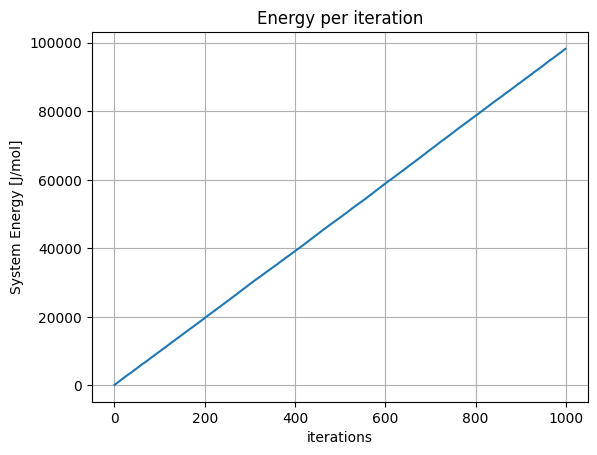

In [44]:
iterations_array= np.arange(ITER)
x_data=iterations_array
y_data= system_energies
save_system_energy_developement= True
save_as= "system energy developement.png"

plt.title("Energy per iteration")
plt.plot(x_data, y_data)
plt.xlabel("iterations")
plt.ylabel("System Energy [J/mol]")
plt.grid(True)
if save_system_energy_developement:
    plt.savefig(save_as)
plt.show()
plt.close()

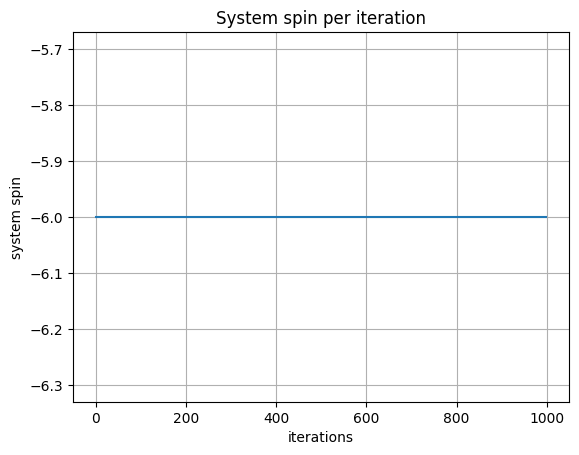

In [45]:
x_data=iterations_array
y_data=system_spin
save_system_spin_developement= True
save_as= "total_spin_developement.png"


plt.title("System spin per iteration")
plt.plot(x_data,y_data)
plt.grid(True)
plt.xlabel("iterations")
plt.ylabel("system spin")
if save_system_spin_developement:
    plt.savefig(save_as)
plt.show()
plt.close()